Exercise from Coursera: 
Use scikit-learn to implement Multiple linear regression. 

Steps:
1.   Download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. 
2.   Split  data into training and test sets 
3. Create a model using training set
4. Evaluate your model using test set
5. Use model to predict unknown value


**ATTRIBUTES:**

**MODELYEAR** e.g. 2014

**MAKE** e.g. Acura

**MODEL** e.g. ILX

**VEHICLE CLASS** e.g. SUV

**ENGINE SIZE** e.g. 4.7

**CYLINDERS** e.g 6

**TRANSMISSION** e.g. A6

**FUELTYPE** e.g. z

**FUEL CONSUMPTION in CITY** (L/100 km) e.g. 9.9

**FUEL CONSUMPTION in HWY** (L/100 km) e.g. 8.9

**FUEL CONSUMPTION COMB** (L/100 km) e.g. 9.2

**CO2 EMISSIONS (g/km)** e.g. 182 --> low --> 0

In general, the lower this figure, the less fuel that a vehicle uses: a car with 90g/km CO2, should have good fuel economy. One with 180g/km CO2 or more will use a lot of fuel. So consumers looking to reduce their running costs ought to be looking out for cars with fewer emissions.

In [0]:
# Import standard packages (pandas, numpy, matplotlib, seaborn -- pms'n)

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

#REGRESSION IMPORTS

from sklearn.linear_model import LinearRegression # linear regression package
from sklearn.model_selection import train_test_split # split dataset
from sklearn.metrics import mean_squared_error as mse # Measurement metric

from math import sqrt

In [0]:
#Load Data 

data = pd.read_csv("fuel.csv")

In [13]:
#Look at Data (shape, head, tail, types --- shtt)
data.shape

#shape (rows, columns)

(868, 15)

In [14]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,CO2 RATING,SMOG RATING
0,2020,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,199,6,3
1,2020,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS9,Z,12.3,9.2,10.9,26,254,4,3
2,2020,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.5,6,AS9,Z,12.2,9.5,11.0,26,258,4,3
3,2020,Acura,MDX Hybrid AWD,SUV: Small,3.0,6,AM7,Z,9.1,9.0,9.0,31,210,5,3
4,2020,Acura,RDX AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6


In [15]:
data.dtypes



MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
CO2 RATING                    int64
SMOG RATING                   int64
dtype: object

In [19]:
#SELECT FEATURES

columns = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']
subset_data = data[columns]

subset_data.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.4,4,9.9,7.0,8.6,199
1,3.5,6,12.3,9.2,10.9,254
2,3.5,6,12.2,9.5,11.0,258
3,3.0,6,9.1,9.0,9.0,210
4,2.0,4,11.0,8.6,9.9,232


In [20]:
#Describe data only when you've chosen which to use and if they're already in int form 
subset_data.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000
mean,3.169470,5.668203,12.357949,9.080876,10.882143,252.480415
std,1.367686,1.912275,3.402665,2.117310,2.784993,59.766546
min,1.000000,3.000000,4.200000,4.000000,4.100000,96.000000
25%,2.000000,4.000000,10.000000,7.600000,9.000000,210.000000
50%,3.000000,6.000000,12.000000,8.800000,10.600000,250.000000
75%,3.800000,6.000000,14.400000,10.300000,12.600000,291.500000
max,8.000000,16.000000,26.800000,18.100000,22.200000,522.000000


In [21]:
#Correlation : which factors are correlated to people cicking on the Ad?

correlation_coefficient = subset_data.corr()
correlation_coefficient 

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.923910,0.839532,0.757189,0.823085,0.838766
CYLINDERS,0.923910,1.000000,0.830445,0.734477,0.809155,0.834017
FUELCONSUMPTION_CITY,0.839532,0.830445,1.000000,0.937211,0.992770,0.950816
FUELCONSUMPTION_HWY,0.757189,0.734477,0.937211,1.000000,0.971933,0.912103
FUELCONSUMPTION_COMB,0.823085,0.809155,0.992770,0.971933,1.000000,0.951251
CO2EMISSIONS,0.838766,0.834017,0.950816,0.912103,0.951251,1.000000


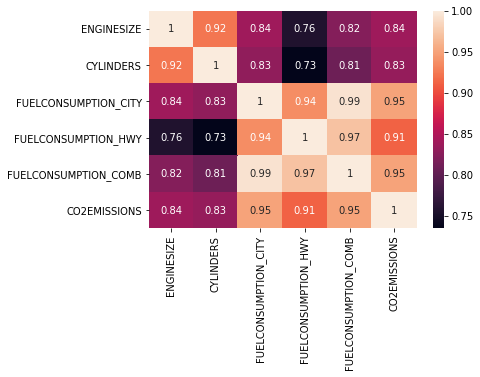

In [22]:
#Heatmap 

sns.heatmap(correlation_coefficient, annot = True)

#RESULT: All features are highly correlated with CO2 emissions 

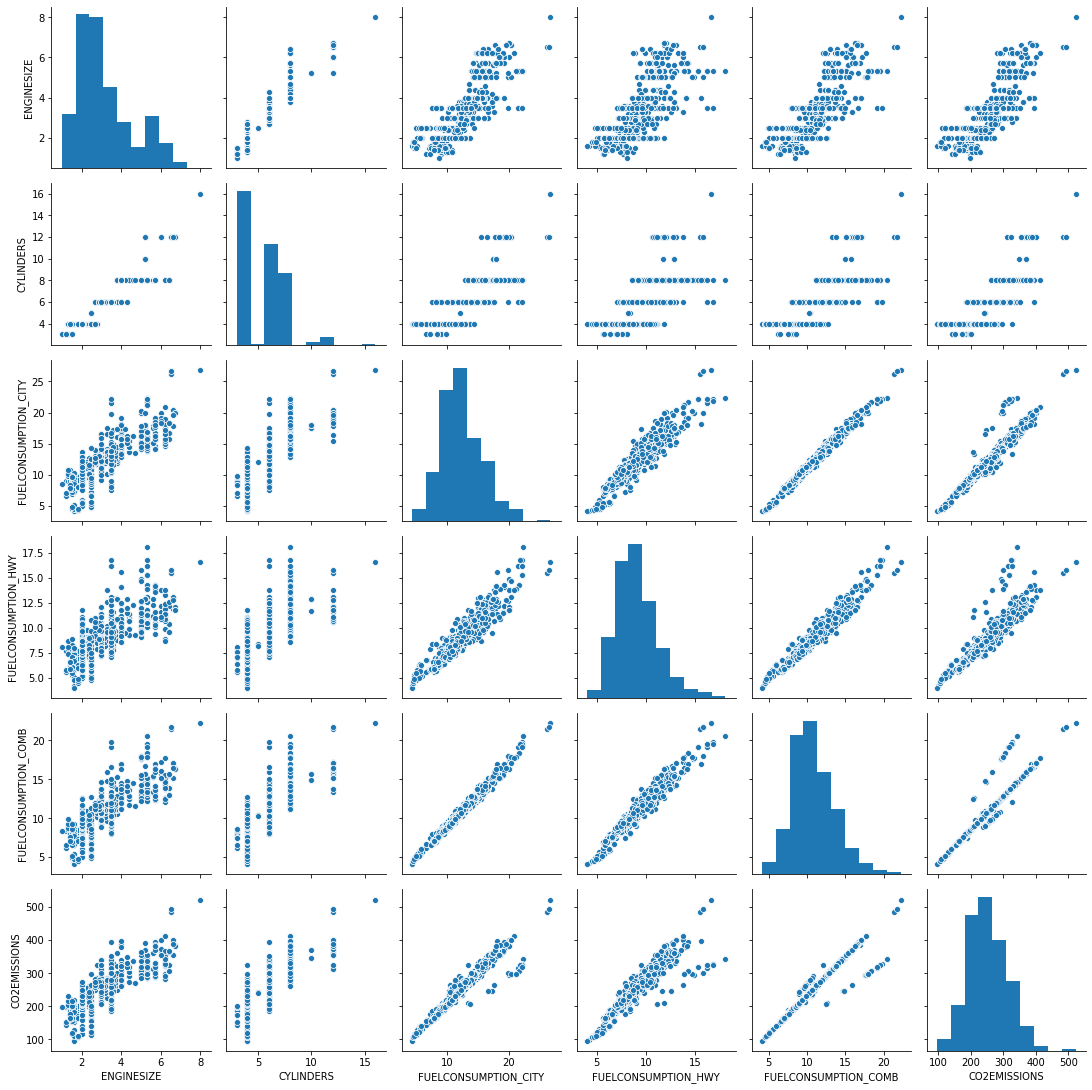

In [23]:
sns.pairplot(subset_data)

#LINEAR relationship for all features with CO2 emissions

In [0]:
# Define Features
features = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']

# Set X
X = data[features]

# Set y
y = data['CO2EMISSIONS']

In [0]:
#TRAIN TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [0]:
# Initialize model
model = LinearRegression() 


In [31]:
# Fit Model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# get coefficients
coefficient = model.coef_

# get intercept
intercept = model.intercept_

In [33]:
# print coefficient
coefficient

array([ 1.64504346,  4.82917897, -2.21234349, -3.2725808 , 22.09586748])

In [34]:
# print intercept
intercept

36.40468839820579

In [35]:
# calculate the R-squared
model.score(X_test, y_test)

#very good R-squared. Around 93% of change in CO2 emissions is because of change in features

0.9252340311645779

EQUATION OF THE LINE: 

CO2 EMISSIONS = 1.65 ENGINE SIZE + 4.83 CYLINDERS - 2.21 FUEL CONSUMPTION CITY - 3.27 FUEL CONSUMPTION HIGHWAY + 22 FUEL CONSUMPTION COMBINED

In [43]:
# put coefficients into dataframe
# pair the feature names with the coefficients
coefficients_pd = pd.DataFrame((list(zip(features, model.coef_))), columns = ['Features', 'Coefficients'])

# print table of coefficients for contribution chart
coefficients_pd

,Features,Coefficients
0,ENGINESIZE,1.645043
1,CYLINDERS,4.829179
2,FUELCONSUMPTION_CITY,-2.212343
3,FUELCONSUMPTION_HWY,-3.272581
4,FUELCONSUMPTION_COMB,22.095867


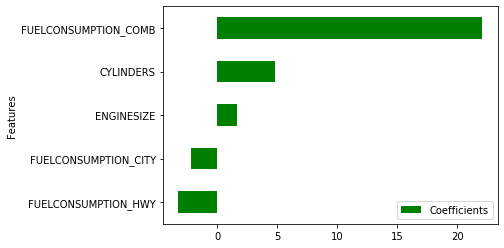

In [44]:
# Plot Contribution chart
coefficients_pd.sort_values('Coefficients').set_index('Features').plot(kind = 'barh', color = 'g')

In [54]:
# We input new advertising data into the model to predict future sales

# Sample ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']
new_data = [[1.5, 3, 5, 9, 11]]

model.predict(new_data)

array([255.89938816])

In [55]:
y_predicted = model.predict(X_test)

np.sqrt(mse(y_predicted, y_test)) # Root mean squared error


16.5636206797355